# Sprint 12 - Final Project
# AtliQ Hardware Product Analysis

We have access to six databases from AtliQ Hardware about their customer base, product line and sales records.

This report will showcase analysis of the AtliQ Hardware databases, extract valuable insights to identify top selling and most profitable products, and create realistic recommendations to improve product sales performance.

## Data Access and Initial Exploration:

In [56]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns

The data resides in an sqlite3 database.  It needs to be imported here so we can make queries in our jupyter notebook.

In [57]:
### connect to the database
import sqlite3
con = sqlite3.connect('/Users/eli/Documents/Programming/TripleTen DA/Sprint 12 - Final Project/atliq_db.sqlite3')

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


I will import the heads of each table to see an overview but I will go more into depth in the tables that have to do with product sales (everything except for customer information).

In [58]:
### import head of each table to see overview of data
query="""Select * from 
dim_customer
"""
dim_customer=pd.read_sql_query(query, con)
dim_customer.head(10)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
5,70004070,Atliq e Store,E-Commerce,Direct,Japan,ROA,APAC
6,70005163,Atliq e Store,E-Commerce,Direct,Pakistan,ROA,APAC
7,70006157,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
8,70006158,Atliq e Store,E-Commerce,Direct,Philiphines,ROA,APAC
9,70007198,Atliq Exclusive,Brick & Mortar,Direct,South Korea,ROA,APAC


In [59]:
query="""Select * from 
dim_product
"""
product=pd.read_sql_query(query, con)
product.head(20)

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
5,A0219150202,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus
6,A0220150203,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium
7,A0320150301,P & A,Peripherals,Internal HDD,AQ Zion Saga,Standard
8,A0321150302,P & A,Peripherals,Internal HDD,AQ Zion Saga,Plus
9,A0321150303,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium


In [60]:
query="""Select * from 
fact_pre_discount
"""
discount=pd.read_sql_query(query, con)
discount.head(10)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.08
1,70002017,2019,0.08
2,70002017,2020,0.07
3,70002017,2021,0.07
4,70002017,2022,0.11
5,70002018,2018,0.30
6,70002018,2019,0.26
7,70002018,2020,0.23
8,70002018,2021,0.21
9,70002018,2022,0.29


In [61]:
query="""Select * from 
fact_manufacturing_cost
"""
cost=pd.read_sql_query(query, con)
cost.head(10)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.62
1,A0118150101,2019,4.20
2,A0118150101,2020,5.02
3,A0118150101,2021,5.52
4,A0118150102,2018,5.60
5,A0118150102,2019,5.32
6,A0118150102,2020,5.72
7,A0118150102,2021,6.28
8,A0118150103,2018,5.95
9,A0118150103,2019,5.53


In [62]:
query="""Select * from 
fact_gross_price
"""
price=pd.read_sql_query(query, con)
price.head(10)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.40
1,A0118150101,2019,14.44
2,A0118150101,2020,16.23
3,A0118150101,2021,19.06
4,A0118150102,2018,19.59
5,A0118150102,2019,18.56
6,A0118150102,2020,19.86
7,A0118150102,2021,21.46
8,A0118150103,2018,19.36
9,A0118150103,2019,19.34


In [63]:
query="""Select * from 
fact_sales_monthly
"""
sales=pd.read_sql_query(query, con)
sales.head(10)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.00,51.00,2018.00
1,2017-09-01,A0118150101,70002018.00,77.00,2018.00
2,2017-09-01,A0118150101,70003181.00,17.00,2018.00
3,2017-09-01,A0118150101,70003182.00,6.00,2018.00
4,2017-09-01,A0118150101,70006157.00,5.00,2018.00
5,2017-09-01,A0118150101,70006158.00,7.00,2018.00
6,2017-09-01,A0118150101,70007198.00,29.00,2018.00
7,2017-09-01,A0118150101,70007199.00,34.00,2018.00
8,2017-09-01,A0118150101,70008169.00,22.00,2018.00
9,2017-09-01,A0118150101,70008170.00,5.00,2018.00


[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]

## Data Cleaning and Preparation:

In the data cleaning stage we will examine each database for missing (null) values and duplicate rows.  We will also change number data to type integer and float.

In [64]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [65]:
product.isnull().sum()

product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

In [66]:
product.duplicated().sum()

0

The products table contains no duplicates or null rows.  The product code contains letters and numbers so it can't be changed to an integer datatype.

In [67]:
def EDA(df):
    display(df.head(5))
    print(df.info())
    print()
    print('null rows:')
    print()
    print(df.isnull().sum())
    print()
    print('duplicate rows:')
    print()
    print(df.duplicated().sum())

In [68]:
EDA(product)

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB
None

null rows:

product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

duplicate rows:

0


In [69]:
EDA(discount)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.08
1,70002017,2019,0.08
2,70002017,2020,0.07
3,70002017,2021,0.07
4,70002017,2022,0.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB
None

null rows:

customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64

duplicate rows:

0


The 'fact_pre_discount' (discount) table has 1045 rows with no null or duplicate rows.  The data types are correct.

In [70]:
EDA(cost)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.62
1,A0118150101,2019,4.20
2,A0118150101,2020,5.02
3,A0118150101,2021,5.52
4,A0118150102,2018,5.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB
None

null rows:

product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64

duplicate rows:

0


The 'fact_manufacturing_cost' (cost) table has 1182 rows with no null or duplicate rows.  The data types are correct.

In [71]:
EDA(price)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.40
1,A0118150101,2019,14.44
2,A0118150101,2020,16.23
3,A0118150101,2021,19.06
4,A0118150102,2018,19.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB
None

null rows:

product_code    0
fiscal_year     0
gross_price     0
dtype: int64

duplicate rows:

0


The 'fact_gross_price' (price) table has 1182 rows with no null or duplicate rows.  The data types are correct.

In [72]:
EDA(sales)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.00,51.00,2018.00
1,2017-09-01,A0118150101,70002018.00,77.00,2018.00
2,2017-09-01,A0118150101,70003181.00,17.00,2018.00
3,2017-09-01,A0118150101,70003182.00,6.00,2018.00
4,2017-09-01,A0118150101,70006157.00,5.00,2018.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB
None

null rows:

date             0
product_code     0
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64

duplicate rows:

0


The 'fact_sales_monthly' (discount) table has 67251 rows with duplicate rows.  However, there are 3 null vales, one in each of the columns for customer_code, sold_quantity and fiscal_year.  Additionally, the data types need to be corrected.  Date needs to be datetime and customer_code, sold_quantity and fiscal_year need to be changed to integers.

In [73]:
#correcting data types
sales['date'] = sales['date'].values.astype('datetime64[D]')
sales['customer_code'] = sales['customer_code'].values.astype('int')
sales['sold_quantity'] = sales['sold_quantity'].values.astype('int')
sales['fiscal_year'] = sales['fiscal_year'].values.astype('int')

/var/folders/fm/f46spdfj3pd95vp2q35zp1y40000gn/T/ipykernel_75872/1188026737.py:3: RuntimeWarning:

invalid value encountered in cast

/var/folders/fm/f46spdfj3pd95vp2q35zp1y40000gn/T/ipykernel_75872/1188026737.py:4: RuntimeWarning:

invalid value encountered in cast

/var/folders/fm/f46spdfj3pd95vp2q35zp1y40000gn/T/ipykernel_75872/1188026737.py:5: RuntimeWarning:

invalid value encountered in cast



In [74]:
sales.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018


In this section we will identify the top-selling products based on sales volume and revenue.  The data for sales volume is located in the fact_sales_monthly database ('sales') and is divided by customer code.  If we also want revenue we need to add the gross price for the product from the fact_gross_price database.  To get actual revenue we will factor in the discount price in another section of this report.




(later: We can use this to calculate the total sales and the cost from the fact_manufacturing_cost table )

In [75]:
price.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.40
1,A0118150101,2019,14.44
2,A0118150101,2020,16.23
3,A0118150101,2021,19.06
4,A0118150102,2018,19.59


## Top product sold by quantity and revenue by year

In [76]:
#join gross price to get sales volume and revenue for each product in the fact_sales_monthly table
query="""Select fact_sales_monthly.product_code, product, variant, fact_sales_monthly.fiscal_year, SUM(sold_quantity) AS quantity_sold, SUM(sold_quantity*gross_price) AS total_revenue 
from 
fact_sales_monthly
LEFT JOIN fact_gross_price ON fact_gross_price.product_code = fact_sales_monthly.product_code AND fact_gross_price.fiscal_year = fact_sales_monthly.fiscal_year
LEFT JOIN dim_product ON dim_product.product_code = fact_sales_monthly.product_code
GROUP BY
    fact_sales_monthly.product_code,
    fact_sales_monthly.fiscal_year
    """
amt_sold=pd.read_sql_query(query, con)
#reformatting pandas so the numbers are shown without scientific notation
pd.options.display.float_format = '{:.2f}'.format
amt_sold.head(10)

,product_code,product,variant,fiscal_year,quantity_sold,total_revenue
0,A0,None,None,NaN,NaN,NaN
1,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2018.00,18664.00,287336.01
2,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2019.00,41608.00,600786.23
3,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2020.00,62631.00,1016645.18
4,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2021.00,100039.00,1906473.23
5,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2018.00,17953.00,351654.39
6,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2019.00,41945.00,778478.23
7,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2020.00,63902.00,1268946.75
8,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2021.00,98124.00,2105397.61
9,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,2018.00,18754.00,363133.70


Now we have the total amount of each product sold in each fiscal year, as well as how much revenue they brought in.

First, lets view this information in a pivot table and heat map so we can see the general breakdown of data and observe trends.

In [77]:
amt_sold_pivot = amt_sold.pivot_table(
index = 'product_code',
columns = 'fiscal_year',
values = 'quantity_sold',
aggfunc= 'sum',
margins=True)
amt_sold_pivot.fillna('')

fiscal_year,2018.0,2019.0,2020.0,2021.0,2022.0,All
product_code,,,,,,
A0118150101,18664.00,41608.00,62631.00,100039.00,,222942.00
A0118150102,17953.00,41945.00,63902.00,98124.00,,221924.00
A0118150103,18754.00,42191.00,61748.00,94481.00,162972.00,380146.00
A0118150104,18534.00,42408.00,60961.00,97931.00,166735.00,386569.00
A0219150201,,42932.00,62464.00,100799.00,172000.00,378195.00
A0219150202,,41074.00,62827.00,97091.00,169156.00,370148.00
A0220150203,,,63680.00,97815.00,165516.00,327011.00
A0320150301,,,64502.00,97160.00,157906.00,319568.00
A0321150302,,,,99955.00,168127.00,268082.00


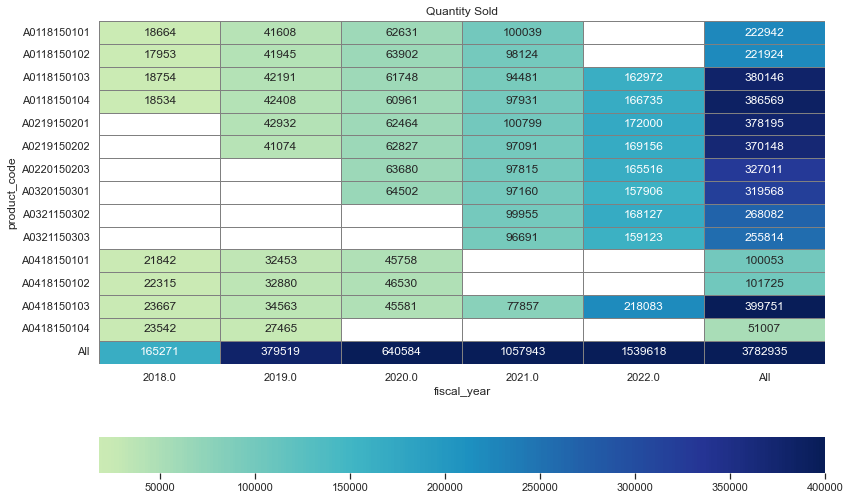

In [78]:
plt.figure(figsize=(13,9))
sns.heatmap(amt_sold_pivot, annot=True, fmt='.0f', cmap='YlGnBu', center=150000, linewidths=1, linecolor='grey',  vmax=400000, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Quantity Sold')
plt.show()

Next, we will write group the data to find the top selling products as well as the top three products for each year.

In [79]:
#top selling products over time
total_sold = amt_sold.groupby(['product_code', 'product', 'variant']).agg({'quantity_sold':sum}).sort_values('quantity_sold', ascending=False).reset_index()
total_sold.index += 1
total_sold.head(3)

,product_code,product,variant,quantity_sold
1,A0418150103,AQ Mforce Gen X,Standard 3,399751.00
2,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,386569.00
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,380146.00


Over the course of five years from 2018-2022, the top three products sold were

1. AQ Mforce Gen X: Standard 3 (product_code=A0418150103, 399751 pieces)

2. AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache: Premium Plus(product_code=A0118150104, 386569 pieces) 

3. AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache: Premium (product_code=A0118150103, 380146 pieces)  

These three products were sold in every year leading to their high sales volume.  Furthermore, these products had sales increasing every year.

Interestingly, the top selling product, the AQ Mforce Gen X: Standard 3 was a high selling in 2018 and 2022 but one of the low sellers in the other years.
Every year, the total amount of products almost doubled except in 2022 where the total number of sales only increased by 50%.  However, the most products were sold during 2022 and two products that were sold in previous years were not sold.  If these two products (the AQ Dracula HDD Standard and Plus models) were continued, the total sales would have continued this trend.

The large sale volume of the AQ Mforce Gen X could also be because of a sales promotion.  Let's see what the revenue was of it as well.

In [80]:
df_agg = amt_sold.groupby(['fiscal_year','product_code', 'product', 'variant']).agg({'quantity_sold':sum}).sort_values('quantity_sold', ascending=False)
df_agg

quantity_sold
fiscal_year product_code product                                                     variant                    
2022.00     A0418150103  AQ Mforce Gen X                                             Standard 3        218083.00
            A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard          172000.00
            A0219150202  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Plus              169156.00
            A0321150302  AQ Zion Saga                                                Plus              168127.00
            A0118150104  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium Plus      166735.00
            A0220150203  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Premium           165516.00
            A0118150103  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium           162972.00
            A0321150303  AQ Zion Saga                                                Premium           159123.00
            A0320150301  AQ Zion Saga                                                Standard          157906.00
2021.00     A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard          100799.00
            A0118150101  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Standard          100039.00
            A0321150302  AQ Zion Saga                                                Plus               99955.00
            A0118150102  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Plus               98124.00
            A0118150104  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium Plus       97931.00
            A0220150203  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Premium            97815.00
            A0320150301  AQ Zion Saga                                                Standard           97160.00
            A0219150202  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Plus               97091.00
            A0321150303  AQ Zion Saga                                                Premium            96691.00
            A0118150103  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium            94481.00
            A0418150103  AQ Mforce Gen X                                             Standard 3         77857.00
2020.00     A0320150301  AQ Zion Saga                                                Standard           64502.00
            A0118150102  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Plus               63902.00
            A0220150203  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Premium            63680.00
            A0219150202  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Plus               62827.00
            A0118150101  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Standard           62631.00
            A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard           62464.00
            A0118150103  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium            61748.00
            A0118150104  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium Plus       60961.00
            A0418150102  AQ Mforce Gen X                                             Standard 2         46530.00
            A0418150101  AQ Mforce Gen X                                             Standard 1         45758.00
            A0418150103  AQ Mforce Gen X                                             Standard 3         45581.00
2019.00     A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard           42932.00
            A0118150104  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium Plus       42408.00
            A0118150103  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium            42191.00
            A0118150102  AQ Dra

In [81]:
#save to csv for dashboard
df_agg.to_csv('quantity_by_year.csv')

In [82]:
def top_3(year):
    df_agg_year = df_agg[df_agg.index.get_level_values('fiscal_year') == year]
    display(df_agg_year.sort_values('quantity_sold', ascending=False).head(3))
    
for year in amt_sold['fiscal_year'][1:6]:
    print('Top Three Products for:', year)
    top_3(year)
    print()

Top Three Products for: 2018.0


quantity_sold
fiscal_year product_code product         variant                  
2018.00     A0418150103  AQ Mforce Gen X Standard 3       23667.00
            A0418150104  AQ Mforce Gen X Plus 1           23542.00
            A0418150102  AQ Mforce Gen X Standard 2       22315.00


Top Three Products for: 2019.0


quantity_sold
fiscal_year product_code product                                                     variant                    
2019.00     A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard           42932.00
            A0118150104  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium Plus       42408.00
            A0118150103  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium            42191.00


Top Three Products for: 2020.0


quantity_sold
fiscal_year product_code product                                                     variant                
2020.00     A0320150301  AQ Zion Saga                                                Standard       64502.00
            A0118150102  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Plus           63902.00
            A0220150203  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Premium        63680.00


Top Three Products for: 2021.0


quantity_sold
fiscal_year product_code product                                                     variant                
2021.00     A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard      100799.00
            A0118150101  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Standard      100039.00
            A0321150302  AQ Zion Saga                                                Plus           99955.00


Top Three Products for: 2018.0


quantity_sold
fiscal_year product_code product         variant                  
2018.00     A0418150103  AQ Mforce Gen X Standard 3       23667.00
            A0418150104  AQ Mforce Gen X Plus 1           23542.00
            A0418150102  AQ Mforce Gen X Standard 2       22315.00

## Top Grossing Products Analysis

First let's look at the revenue for our products in general.

In [83]:
amt_rev_pivot = amt_sold.pivot_table(
index = 'product_code',
columns = 'fiscal_year',
values = 'total_revenue',
aggfunc= 'sum',
margins=True)
amt_rev_pivot.fillna('')

fiscal_year,2018.0,2019.0,2020.0,2021.0,2022.0,All
product_code,,,,,,
A0118150101,287336.01,600786.23,1016645.18,1906473.23,,3811240.66
A0118150102,351654.39,778478.23,1268946.75,2105397.61,,4504476.97
A0118150103,363133.70,816151.14,1366588.21,2057748.94,3910024.22,8513646.22
A0118150104,362790.08,784853.34,1266367.24,2249759.07,3939914.70,8603684.42
A0219150201,,792795.19,1388562.23,2388805.26,4304919.20,8875081.88
A0219150202,,855255.15,1517661.58,2401176.94,4254560.97,9028654.63
A0220150203,,,1523181.02,2309940.35,4267101.79,8100223.16
A0320150301,,,1437465.77,2304858.67,4076643.41,7818967.85
A0321150302,,,,2709050.38,4961007.45,7670057.83


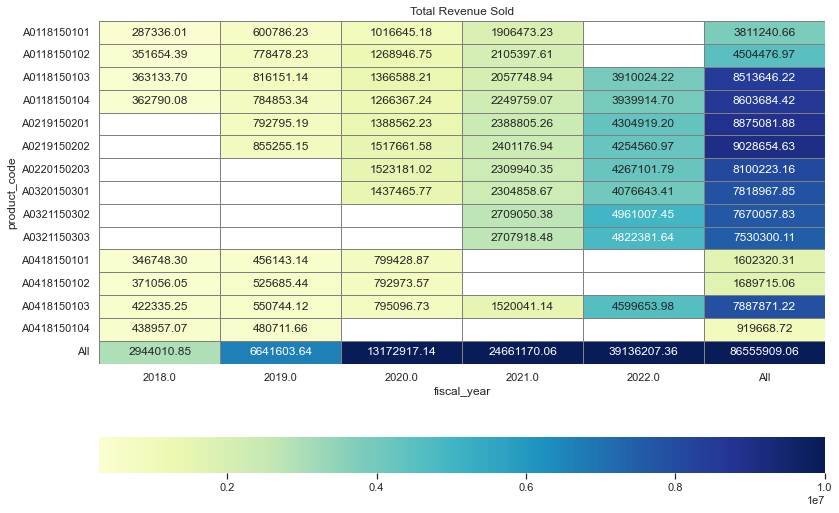

In [84]:
plt.figure(figsize=(13,9))
sns.heatmap(amt_rev_pivot, annot=True, fmt='.2f', cmap='YlGnBu', center=5000000, linewidths=1, linecolor='grey',  vmax=10000000, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Total Revenue Sold')
plt.show()

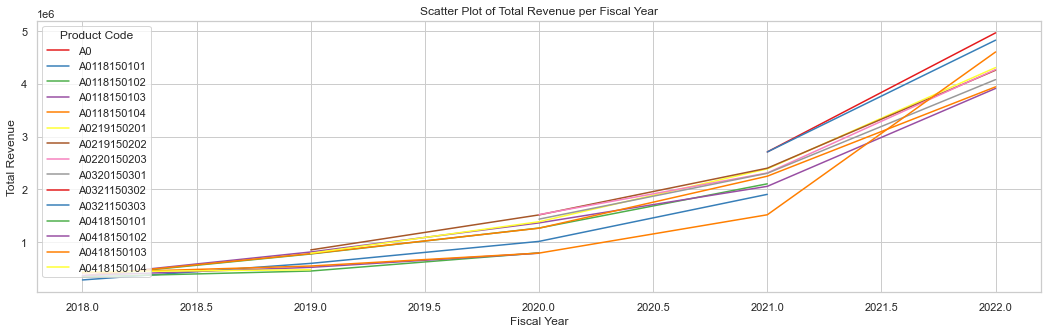

In [85]:
sns.set(style='whitegrid')

# Scatter plot with color-coded fiscal years
plt.figure(figsize=(18, 5))
sns.lineplot(data=amt_sold, x='fiscal_year', y='total_revenue', hue='product_code', palette='Set1')

# Adding plot details
plt.title("Scatter Plot of Total Revenue per Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Revenue")

plt.legend(title='Product Code')

# Display the plot
plt.show()

Sales went up in every year for every product!

The graph tells us also when certain products were introduced and discountinued.  For example when the AQ Zion Saga Plus (A0321150302) and Premium (A0321150303) started sales in 2021, they had a higher revenue than all the other products including money made in previous years.

Also we can see the sharp increase in the orange AQ Mforce Gen X (A041815103) from 2021-2022 as a shift from a bottom seller to the top third in revenue.  It is useful to note that during 2021, two other products were discontinued: AQ Mforce Gen X Standard 1 & 2	(A0418150101 and A0418150102).  A year ealier the AQ Mforce Gen X -Plus 1 (A0418150104) was dicontinued.  The remaining AQ Mforce Gen X product, the Standard 3 (A041815103) probably received some of the sales from customers happy with the standard 1 and two and as a result had a sudden increase in sales.

In [86]:
#top selling products over time with names
total_rev = amt_sold.groupby(['product_code', 'product', 'variant']).agg({'total_revenue':sum}).sort_values('total_revenue', ascending=False)
total_rev

,,,total_revenue
product_code,product,variant,
A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,9028654.63
A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,8875081.88
A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,8603684.42
A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,8513646.22
A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,8100223.16
A0418150103,AQ Mforce Gen X,Standard 3,7887871.22
A0320150301,AQ Zion Saga,Standard,7818967.85
A0321150302,AQ Zion Saga,Plus,7670057.83
A0321150303,AQ Zion Saga,Premium,7530300.11


The top three grossing products were:

9028654.63 A0219150202	AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm	Plus

8875081.88 A0219150201	AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm	Standard

8603684.42 A0118150104	AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache	Premium Plus	



In [87]:
total_rev_year = amt_sold.groupby(['fiscal_year','product_code', 'product', 'variant']).agg({'total_revenue':sum}).sort_values(['fiscal_year', 'total_revenue'], ascending=False)
#total_rev_year

The below code allows use to see the top three products for each year.

### Best sellers for each year:

2018: AQ Mforce Gen X - Plus 1

2019: AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm	Plus

2020: AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm	Premium (with the Plus variation close behind)

2021: AQ Zion Saga	Plus (with the Premium variation almost tied)

2022: AQ Zion Saga	Plus (again with the Premium variation in a close second)

In [88]:
def top_3_rev(year):
    top_rev_year = total_rev_year[total_rev_year.index.get_level_values('fiscal_year') == year]
    display(top_rev_year.sort_values('total_revenue', ascending=False).head(3))
    
    #amt_sold['fiscal_year'][0:5]
    
for yr in [2018.0, 2019.0, 2020.0, 2021.0, 2022.0]:
    print('Top Three Grossing Products for:', yr)
    top_3_rev(yr)
    print()

Top Three Grossing Products for: 2018.0


total_revenue
fiscal_year product_code product         variant                  
2018.00     A0418150104  AQ Mforce Gen X Plus 1          438957.07
            A0418150103  AQ Mforce Gen X Standard 3      422335.25
            A0418150102  AQ Mforce Gen X Standard 2      371056.05


Top Three Grossing Products for: 2019.0


total_revenue
fiscal_year product_code product                                                     variant                
2019.00     A0219150202  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Plus          855255.15
            A0118150103  AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache Premium       816151.14
            A0219150201  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm           Standard      792795.19


Top Three Grossing Products for: 2020.0


total_revenue
fiscal_year product_code product                                           variant                
2020.00     A0220150203  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm Premium      1523181.02
            A0219150202  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm Plus         1517661.58
            A0320150301  AQ Zion Saga                                      Standard     1437465.77


Top Three Grossing Products for: 2021.0


total_revenue
fiscal_year product_code product                                           variant               
2021.00     A0321150302  AQ Zion Saga                                      Plus        2709050.38
            A0321150303  AQ Zion Saga                                      Premium     2707918.48
            A0219150202  AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm Plus        2401176.94


Top Three Grossing Products for: 2022.0


total_revenue
fiscal_year product_code product         variant                  
2022.00     A0321150302  AQ Zion Saga    Plus           4961007.45
            A0321150303  AQ Zion Saga    Premium        4822381.64
            A0418150103  AQ Mforce Gen X Standard 3     4599653.98

If the graphs for revenue and sales volume follow the same trend then we can see a positive correlation as expected.  However, if they are different it could points to a certain sales promotion that helped a top selling product to be a low grosser.

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# graph quantity sold and total revenue by product

# Create figure with subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Quantity Sold", "Total Revenue"))

# Add traces for Quantity Sold
fig.add_trace(
    go.Bar(x=amt_sold["product_code"], y=amt_sold['quantity_sold'], name="quantity_sold"),
    row=1, col=1
)

# Add traces for Total Revenue
fig.add_trace(
    go.Bar(x=amt_sold["product_code"], y=amt_sold["total_revenue"], name="total_revenue"),
    row=1, col=2
)

# Add figure title
fig.update_layout(
    title_text="Quantity and Revenue for each Product"
)

# Set x-axis title
fig.update_xaxes(title_text="Product ID", row=1, col=1)
fig.update_xaxes(title_text="Product ID", row=1, col=2)

# Set y-axes titles
fig.update_yaxes(title_text="Quantity", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=1, col=2)

fig.show()

When we graph quantity and revenue side by side we can see more patterns in the data.  

In general, the products that sold very little (under 230K pieces), also had proportionatly very little revenue (less than 4.4 million).  

The top selling products, namely the 

In [90]:
test = total_rev.reset_index()
test.index = test.index + 1
pd.set_option("display.max_colwidth", None)
test

,product_code,product,variant,total_revenue
1,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,9028654.63
2,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,8875081.88
3,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,8603684.42
4,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,8513646.22
5,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,8100223.16
6,A0418150103,AQ Mforce Gen X,Standard 3,7887871.22
7,A0320150301,AQ Zion Saga,Standard,7818967.85
8,A0321150302,AQ Zion Saga,Plus,7670057.83
9,A0321150303,AQ Zion Saga,Premium,7530300.11
10,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,4504476.97


In [91]:
#total revenue rank for top selling 3 products
top_3 = ['A0418150103', 'A0118150104', 'A0118150103']
for product in top_3:
    display(test[test['product_code']==product])
#test[test['product_code']=='A0118150104']
#test[test['product_code']=='A0118150103']

,product_code,product,variant,total_revenue
6,A0418150103,AQ Mforce Gen X,Standard 3,7887871.22


,product_code,product,variant,total_revenue
3,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,8603684.42


,product_code,product,variant,total_revenue
4,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,8513646.22


Only one product that made the top three in sales also made the top 3 in revenue:

The second best selling product, AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache:  Premium Plus (product code= A0118150104) was the third grosser with a revenue of 8603684.42.

The top selling product, AQ Mforce Gen X came in sixth in sales in sales revenue.  This still may be a strong product but since it wasn't sold much during the first few years it came in low overall on sales.  If the product had a high revenue and high sales during the last year than we can treat it as such.  Indeed, this product was not the top seller in 2022 but was in the top three, only behind the AQ Zion Saga.

deeper query to explore cost and discount to find product margin.. are we actually making money off of these top selling products.  first join the tables in sql and then find the product margin (try in sql and then go to pandas if needed)

## Most profitable products

To find the most profitable profits we need to use the cost for each product for each fiscal year and multiply it by the quantity sold for each fiscal year to get the total cost.  This can be subtracted from the total revenue to get profit.

In [92]:
amt_sold.head()

,product_code,product,variant,fiscal_year,quantity_sold,total_revenue
0,A0,None,None,NaN,NaN,NaN
1,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2018.00,18664.00,287336.01
2,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2019.00,41608.00,600786.23
3,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2020.00,62631.00,1016645.18
4,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2021.00,100039.00,1906473.23


In [93]:
sales.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018


In [94]:
#'fact_manufacturing_cost'
cost.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.62
1,A0118150101,2019,4.20
2,A0118150101,2020,5.02
3,A0118150101,2021,5.52
4,A0118150102,2018,5.60


## Complete Sales Information

The query below allows us to see each products sale information for each year along with the manufacturing cost for all the sold products and the net profit received.

In [131]:
#join manufacturing cost for each year to get manufacturing_cost.  Muiltipy by quantity sold to get total_cost.  total_revenue - total_cost=net_profit for each product for each year
query="""Select fact_sales_monthly.product_code, product, variant, fact_sales_monthly.fiscal_year, SUM(sold_quantity) AS quantity_sold, SUM(sold_quantity*gross_price) AS total_revenue, manufacturing_cost, SUM(sold_quantity)* manufacturing_cost AS total_cost, (SUM(sold_quantity*gross_price) - (SUM(sold_quantity)* manufacturing_cost)) AS net_profit
from 
fact_sales_monthly
LEFT JOIN fact_gross_price ON fact_gross_price.product_code = fact_sales_monthly.product_code AND fact_gross_price.fiscal_year = fact_sales_monthly.fiscal_year
LEFT JOIN dim_product ON dim_product.product_code = fact_sales_monthly.product_code
LEFT JOIN fact_manufacturing_cost ON fact_manufacturing_cost.product_code = fact_sales_monthly.product_code AND fact_manufacturing_cost.cost_year = fact_sales_monthly.fiscal_year
GROUP BY
    fact_sales_monthly.product_code,
    fact_sales_monthly.fiscal_year
    """
profit=pd.read_sql_query(query, con)
#reformatting pandas so the numbers are shown without scientific notation
pd.options.display.float_format = '{:.2f}'.format
profit['profit_margin'] = profit['net_profit']/profit['total_revenue']
profit=profit.dropna()
profit

,product_code,product,variant,fiscal_year,quantity_sold,total_revenue,manufacturing_cost,total_cost,net_profit,profit_margin
1,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2018.00,18664.00,287336.01,4.62,86209.02,201127.00,0.70
2,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2019.00,41608.00,600786.23,4.20,174890.91,425895.33,0.71
3,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2020.00,62631.00,1016645.18,5.02,314451.46,702193.72,0.69
4,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,2021.00,100039.00,1906473.23,5.52,551935.17,1354538.06,0.71
5,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2018.00,17953.00,351654.39,5.60,100601.43,251052.96,0.71
6,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2019.00,41945.00,778478.23,5.32,223294.21,555184.02,0.71
7,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2020.00,63902.00,1268946.75,5.72,365391.64,903555.11,0.71
8,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,2021.00,98124.00,2105397.61,6.28,616562.15,1488835.45,0.71
9,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,2018.00,18754.00,363133.70,5.95,111528.16,251605.54,0.69
10,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,2019.00,42191.00,816151.14,5.53,233341.54,582809.60,0.71


In [96]:
#make the profit table into a pivot table and heat map so we can easily see trends.
profit_pivot = profit.pivot_table(
index = 'product_code',
columns = 'fiscal_year',
values = 'net_profit',
aggfunc= 'sum',
margins=True)
profit_pivot.fillna('')

fiscal_year,2018.0,2019.0,2020.0,2021.0,2022.0,All
product_code,,,,,,
A0118150101,201127.00,425895.33,702193.72,1354538.06,,2683754.11
A0118150102,251052.96,555184.02,903555.11,1488835.45,,3198627.54
A0118150103,251605.54,582809.60,975945.66,1435119.15,2739380.05,5984860.00
A0118150104,253517.32,554823.86,871407.01,1581879.44,2711828.06,5973455.70
A0219150201,,547009.49,983433.22,1678192.47,3007471.60,6216106.78
A0219150202,,599093.04,1074165.78,1701820.76,3023934.15,6399013.73
A0220150203,,,1073466.50,1590383.87,3037334.46,5701184.82
A0320150301,,,996181.79,1590120.56,2856961.68,5443264.03
A0321150302,,,,1927792.10,3541780.19,5469572.30


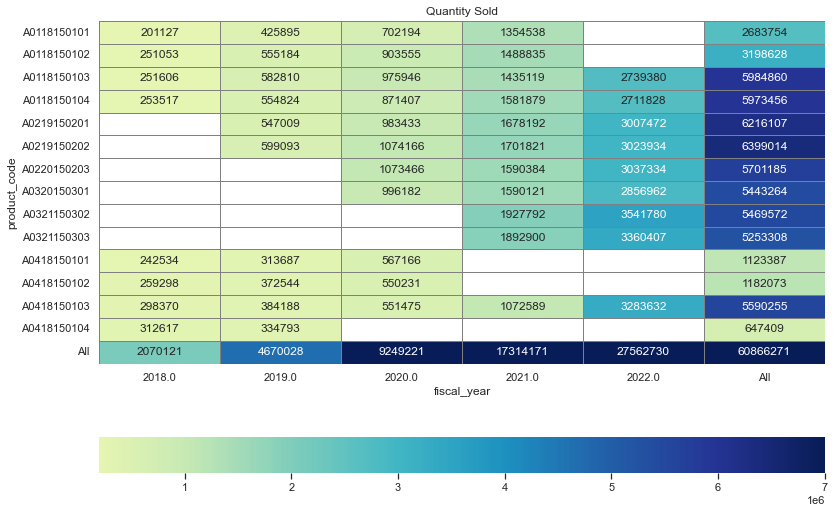

In [97]:
plt.figure(figsize=(13,9))
sns.heatmap(profit_pivot, annot=True, fmt='.0f', cmap='YlGnBu', center=3000000, linewidths=1, linecolor='grey',  vmax=7000000, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Quantity Sold')
plt.show()

In [133]:
#export profit table(comeplete sales data) to csv for dashboard
profit.to_csv('complete_sales_data1.csv')

## Most Profitible Products Over Time

In [99]:
#most profitible products over time
best_profit = profit.groupby(['product_code', 'product', 'variant']).agg({'net_profit':sum}).sort_values('net_profit', ascending=False).reset_index()
best_profit.index += 1
best_profit.head(10)

,product_code,product,variant,net_profit
1,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,6399013.73
2,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,6216106.78
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,5984860.00
4,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,5973455.70
5,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,5701184.82
6,A0418150103,AQ Mforce Gen X,Standard 3,5590255.04
7,A0321150302,AQ Zion Saga,Plus,5469572.30
8,A0320150301,AQ Zion Saga,Standard,5443264.03
9,A0321150303,AQ Zion Saga,Premium,5253307.62
10,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,3198627.54


We can see from the above heatmap and table which products brought the biggest profit over time and also those that performed well each year.

The top three profitable products were:

6399013.73 - A0219150202	AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm	Plus

6216106.78 - A0219150201	AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm	Standard

5984860.00 - A0118150103	AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache	Premium	


In [100]:
#save to csv for dashboard
best_profit.to_csv('best_profit.csv')

## Profit Margin

In [102]:
profit_margin_pivot = profit.pivot_table(
index = 'product_code',
columns = 'fiscal_year',
values = 'profit_margin',
aggfunc= 'mean',
margins=True)
profit_margin_pivot.fillna('')

fiscal_year,2018.0,2019.0,2020.0,2021.0,2022.0,All
product_code,,,,,,
A0118150101,0.70,0.71,0.69,0.71,,0.70
A0118150102,0.71,0.71,0.71,0.71,,0.71
A0118150103,0.69,0.71,0.71,0.70,0.70,0.70
A0118150104,0.70,0.71,0.69,0.70,0.69,0.70
A0219150201,,0.69,0.71,0.70,0.70,0.70
A0219150202,,0.70,0.71,0.71,0.71,0.71
A0220150203,,,0.70,0.69,0.71,0.70
A0320150301,,,0.69,0.69,0.70,0.69
A0321150302,,,,0.71,0.71,0.71


The profit margin is aroung 0.7 across the board.  This means that all products were sold at a normal price with no large discounts compromising profit for quantity.

In [103]:
# Create figure with subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Net Profit", "Total Revenue"))

# Add traces for net profit
fig.add_trace(
    go.Bar(x=profit["product_code"], y=profit['net_profit'], name="net_profit"),
    row=1, col=1
)

# Add traces for Total Revenue
fig.add_trace(
    go.Bar(x=profit["product_code"], y=profit["total_revenue"], name="total_revenue"),
    row=1, col=2
)

# Add figure title
fig.update_layout(
    title_text="Net Profit and Gross Revenue for each Product"
)

# Set x-axis title
fig.update_xaxes(title_text="Product ID", row=1, col=1)
fig.update_xaxes(title_text="Product ID", row=1, col=2)

# Set y-axes titles
fig.update_yaxes(title_text="Profit", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=1, col=2)

fig.show()

These two charts above are very similar.  Each products profit margin is around 70% so it makes sense that the most profit came from the products that also had the most revenue.  

The ranking of most profitable/highest grossing is very similar but the Premium Dracula HDD was slightly more profitable than the Premium Plus version.

## Conclusion

In [104]:
# graph quantity sold and profit by product

# Create figure with subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Quantity Sold", "Net Profit"))

# Add traces for Quantity Sold
fig.add_trace(
    go.Bar(x=amt_sold["product_code"], y=amt_sold['quantity_sold'], name="quantity_sold"),
    row=1, col=1
)

# Add traces for Total Revenue
fig.add_trace(
    go.Bar(x=profit["product_code"], y=profit['net_profit'], name="net_profit"),
    row=1, col=2
)

# Add figure title
fig.update_layout(
    title_text="Quantity and Profit for each Product"
)

# Set x-axis title
fig.update_xaxes(title_text="Product ID", row=1, col=1)
fig.update_xaxes(title_text="Product ID", row=1, col=2)

# Set y-axes titles
fig.update_yaxes(title_text="Quantity", row=1, col=1)
fig.update_yaxes(title_text="Net Profit", row=1, col=2)

fig.show()

In [105]:
best_profit = best_profit.rename_axis('Profit Rank').reset_index()

In [106]:
total_sold = total_sold.rename_axis('Quantity Rank').reset_index()

In [118]:
best = best_profit.merge(total_sold, on=['product_code', 'product', 'variant'])
best= best[['product_code', 'product', 'variant', 'Profit Rank', 'net_profit', 'Quantity Rank', 'quantity_sold']]
best.head(10)

,product_code,product,variant,Profit Rank,net_profit,Quantity Rank,quantity_sold
0,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,1,6399013.73,5,370148.00
1,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,2,6216106.78,4,378195.00
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,3,5984860.00,3,380146.00
3,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,4,5973455.70,2,386569.00
4,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,5,5701184.82,6,327011.00
5,A0418150103,AQ Mforce Gen X,Standard 3,6,5590255.04,1,399751.00
6,A0321150302,AQ Zion Saga,Plus,7,5469572.30,8,268082.00
7,A0320150301,AQ Zion Saga,Standard,8,5443264.03,7,319568.00
8,A0321150303,AQ Zion Saga,Premium,9,5253307.62,9,255814.00
9,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus,10,3198627.54,11,221924.00


In [116]:
best1 = best[['Profit Rank', 'net_profit', 'product_code', 'product', 'variant', 'Quantity Rank', 'quantity_sold']]
best1.set_index('Profit Rank', inplace=True)
best1

,net_profit,product_code,product,variant,Quantity Rank,quantity_sold
Profit Rank,,,,,,
1,6399013.73,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,5,370148.00
2,6216106.78,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,4,378195.00
3,5984860.00,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,3,380146.00
4,5973455.70,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,2,386569.00
5,5701184.82,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,6,327011.00
6,5590255.04,A0418150103,AQ Mforce Gen X,Standard 3,1,399751.00
7,5469572.30,A0321150302,AQ Zion Saga,Plus,8,268082.00
8,5443264.03,A0320150301,AQ Zion Saga,Standard,7,319568.00
9,5253307.62,A0321150303,AQ Zion Saga,Premium,9,255814.00


The two most profitable products also brought in the most revenue.  These are the A0219150202 AQ WereWolf NAS Internal Hard Drive HDD Plus bringing in 6.4 million in profit and its lower model the A0219150201 AQ WereWolf NAS Internal Hard Drive HDD Standard bringing in 6.2 million in profit. Even though these products were not the top sellers (coming in 5th and 4th), they were more profitable than the top sellers.

The third most profitable product, the A0118150103 AQ Dracula HDD - Premium, was the third leader in quantity and still brought in almost 6 million in profit.

Notable, the leader in quantity sold, the A0220150203 - AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm - Premium	product was 6th in profit.  

Sometimes a product has a lower product margin but brings in more profit if it has very high sales.  We found that all profits have a similar profit margin (around 70%).  If a this popular product had a very high margin, increasing sales with a promotion would still mean a profit.  However, this is not the case.  Sales should be encouraged but more attention should be put on the A0219150202 AQ WereWolf which made more profit than the others, thanks in part to its slightly higher profit margin (teetering on 71%).

These products should be continued but also special attention should be paid to the AQ Zion Saga Plus and Premium (A0321150302	and A0321150303) because after only being in the market two years and selling less in quantity, they made a decent profit.  Around 5.4 million in two years give them a decent chance to outperform the other models in later years.



In [119]:
#export table to csv for dashboard
best.to_csv('best.csv')

[Here is the link to the Tableau dashboard](https://public.tableau.com/views/TopSellingProductAnalysisAtilQHardware/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)

This dashboard contains import charts outlining the best selling products in profit and quantity from 2018-2022.  There is a filter on the side that allows the user to select one year or all years and view the charts and table for those corresponding years.